# Primerjava analitike in numerike #

In [1]:
import numpy  as np
from scipy import signal
from scipy.fft import fft, fftfreq, fftshift
from scipy.interpolate import UnivariateSpline
from scipy.interpolate import make_interp_spline, BSpline
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
import matplotlib.lines as mlines
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 9]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
plt.rcParams.update({'text.usetex': True,
                     'font.size': 31,
                     'font.family':'lmodern',})

## ROC v odvisnosti od $\gamma$ ##

In [2]:
f_ROC = lambda x, mu, gamma : x - 1/2 * mu * (1/np.sqrt(gamma**2+x**2) - 1) * x
k_ROC = lambda x, mu, gamma : 1 + 1/2 * mu - (mu*gamma**2) / (2*np.sqrt(gamma**2+x**2)**3)
xp = np.linspace(-1, 1, 1000)

findfont: Font family ['lmodern'] not found. Falling back to DejaVu Sans.


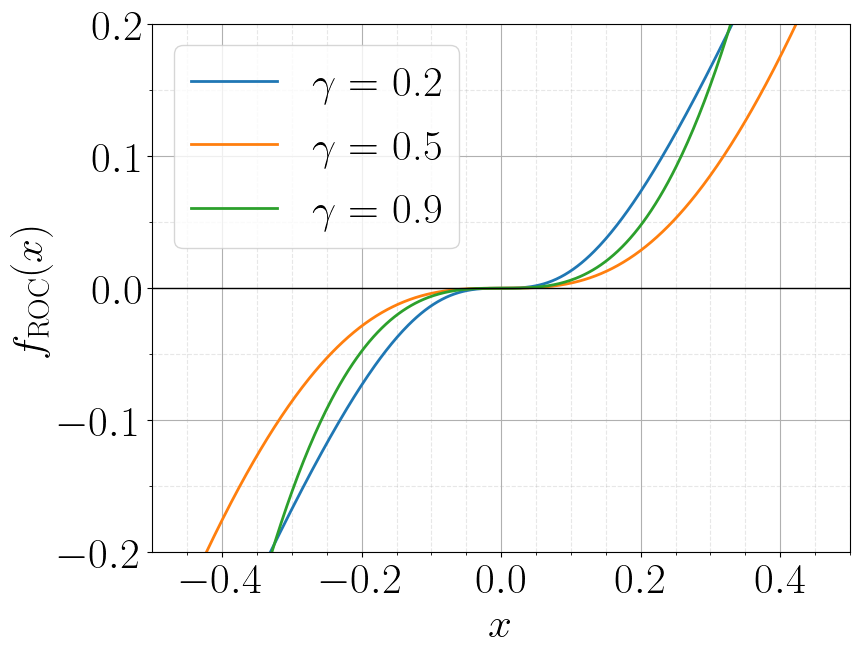

In [3]:
gamma_i = [0.2, 0.5, 0.9]

plt.rcParams['figure.figsize'] = [9, 7]
for gamma in gamma_i:
    mu = 2*gamma / (1-gamma)
    plt.plot(xp, f_ROC(xp, mu, gamma), linestyle="-", lw=2, label=r'$\gamma=$'+f' {gamma}')

plt.xlabel(r'$x$')
plt.ylabel(r'$f_\mathrm{ROC}(x)$')
plt.locator_params(axis="x", nbins=5)
plt.locator_params(axis="y", nbins=5)
plt.xlim(-0.5, 0.5)
plt.ylim(-0.2, 0.2)
plt.gca().yaxis.set_minor_locator(AutoMinorLocator(2))
plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
plt.grid()
plt.grid(which='minor', linestyle = '--', alpha=0.3)
plt.axhline(0, color='black', lw=1)
plt.legend()
plt.savefig('f_ROC.pdf', format='pdf', bbox_inches = "tight")
plt.show()

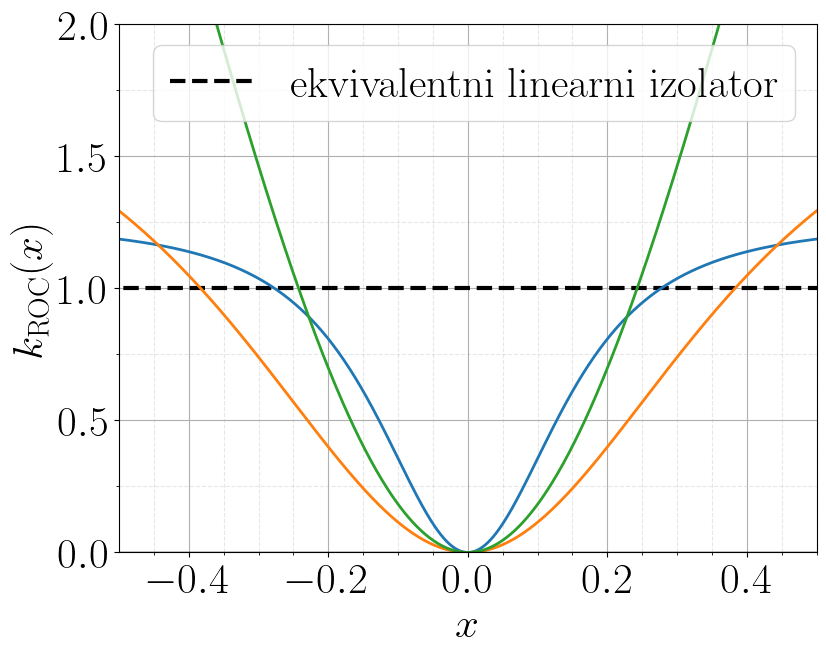

In [4]:
gamma_i = [0.2, 0.5, 0.9]

plt.rcParams['figure.figsize'] = [9, 7]
for gamma in gamma_i:
    mu = 2*gamma / (1-gamma)
    plt.plot(xp, k_ROC(xp, mu, gamma), linestyle="-", lw=2)

plt.hlines(1, -1, 1, color='black', linestyle="--", lw=3, label='ekvivalentni linearni izolator')

plt.xlabel(r'$x$')
plt.ylabel(r'$k_\mathrm{ROC}(x)$')
plt.locator_params(axis="x", nbins=5)
plt.locator_params(axis="y", nbins=5)
plt.xlim(-0.5, 0.5)
plt.ylim(0, 2)
plt.gca().yaxis.set_minor_locator(AutoMinorLocator(2))
plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
plt.grid()
plt.grid(which='minor', linestyle = '--', alpha=0.3)
plt.axhline(0, color='black', lw=1)
plt.legend()
plt.savefig('k_ROC.pdf', format='pdf', bbox_inches = "tight")
plt.show()

## ROC statika ##

In [8]:
## Parametri
Ep = 2400 #MPa
En = 2200 #MPa
t1 = 0.5 #mm
t2 = 0.25 #mm
h = 10*t2 #mm
b = 4 #mm
I1 = b*t1**3 / 12 #mm^4
I2 = b*t2**3 / 12 #mm^4
l1 = 13 #mm
l2 = 20.37 #mm

def F_analitika(Ep, En):
    # Analitične vrednosti togosti posameznih območij (Mathematica)
    kp = 20.372*Ep*I1/l1**3
    kn1 = 9250*En*I2/l2**3
    kn2 = -1253.18*En*I2/l2**3
    kn3 = 10571.42*En*I2/l2**3

    # celotne togosti in pomiki ROC
    k1 = kp+1/2*kn1
    k2 = kp+1/2*kn2
    k3 = kp+1/2*kn3
    dzg = 2*0.16*h
    dsr = 2*1.33*h
    dsp = 2*1.92*h
    dk = 2*1.99*h
    # skupne sile
    F1 = k1*(dzg-0)
    F2 = F1 + k2*(dsp-dzg)
    F3 = F2 + k3*(dk-dsp)
    # pozitivne sile
    Fp = kp*dk
    # negativne sile
    Fzg = 1/2*kn1*(dzg-0)
    Fsp = Fzg + 1/2*kn2*(dsp-dzg)
    
    d = np.array([dzg, dsr, dsp, dk])
    F = np.array([F1, F2, F3])
    
    return(d, F)

d = F_analitika(Ep, En)[0]
F = F_analitika(Ep, En)[1]

In [9]:
# Zvezna sila z Taylorjevo vrsto
upsilon = k2
mu = 2
gamma = mu/(mu+2)
##
n0 = (F[0]+F[1])/2
a1 = 1/(2*(1-gamma)*gamma**2)
a2 = -3/(8*(1-gamma)*gamma**4)
a3 = upsilon
b1 = 220
b2 = 0.04
xp = np.linspace(0, dk, 50)
##
Fapr = lambda x : n0 + a3*x + b1*(a1*(b2*(x-dk/2))**3 + a2*(b2*(x-dk/2))**5)

NameError: name 'k2' is not defined

In [ ]:
plt.rcParams['figure.figsize'] = [18, 12]

# Analitična sila
plt.plot(np.array([0, d[0], d[2], d[3]]), np.array([0, F[0], F[1], F[2]]), 
             linestyle="-", lw=2, color='tab:green', 
             label= r' $E_n =$'+ f'{En}')
# Sila z Taylorjevo aproksimacijo
plt.plot(xp, Fapr(xp), linestyle="-", lw=5, color='tab:orange', label=r'sila $F_{ROC}(X)$')

plt.xlabel(r'$X$ [mm]')
plt.ylabel(r'$F$ [N]')
plt.locator_params(axis="x", nbins=10)
plt.locator_params(axis="y", nbins=10)
plt.xlim(0, 10)
plt.ylim(-2, 16)
plt.gca().yaxis.set_minor_locator(AutoMinorLocator(2))
plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
plt.grid()
plt.grid(which='minor', linestyle = '--', alpha=0.3)
plt.axhline(0, color='black', lw=1)
plt.legend()
plt.savefig('sile_ROC.pdf', format='pdf')
plt.show()

## ROC dinamika ##

### Analitika ###

In [20]:
# SPREMENLJIVKE
# amplitude A in B
A = 7
B = 0.001*A
# mase
m = 0.44*10**(-3)# kg
M = 1.72*10**(-3) # kg
beta = m/M
# togosti
t3 = 0.75
l3 = 13
I3 = b*t3**3 / 12 #mm^4
K = 2*(20.372*Ep*I3/l3**3) # togost drugega elementa
k_i = np.array([
    0.0015709736188917916, 0.02330036244554572, 0.04534940455201473, 0.07946166387484435, 0.11285900504761656, 
    0.14634741249380365, 0.17824608939623385, 0.2233524703637903, 0.2654604827105583])
alpha_i = k_i/K
# dušenje
zeta = 0.1 * np.sqrt(3*beta/(8*(1+beta)**3))
# lastne frekvence
omega_0 = np.sqrt(K/M)
kappa_i = np.sqrt(alpha_i/beta)
# aproksimacijska funkcija
mu = 2
gamma = mu/(mu+2)
upsilon_i = k_i

delta = 1/(2*(1-gamma)*gamma**2)
eta = -3/(8*(1-gamma)*gamma**4)

# FUNKCIJA
f_a = np.linspace(0,100,1000)

mu_u = lambda omega, kappa, alpha, upsilon: np.arccos( 
        ( (2*kappa**2*(A*B*(3*delta+10*A*B*eta)+upsilon) + 4j*zeta*kappa*omega - (2+alpha+kappa**2)*(A*B*(3*delta+10*A*B*eta)+upsilon))*omega**2 - 2j*(1+beta)*zeta*kappa*omega**3+omega**4 ) /
            (2*kappa**2*(A*B*(3*delta+10*A*B*eta)+upsilon)+4j*zeta*kappa*omega-2*omega**2)
        )

No handles with labels found to put in legend.


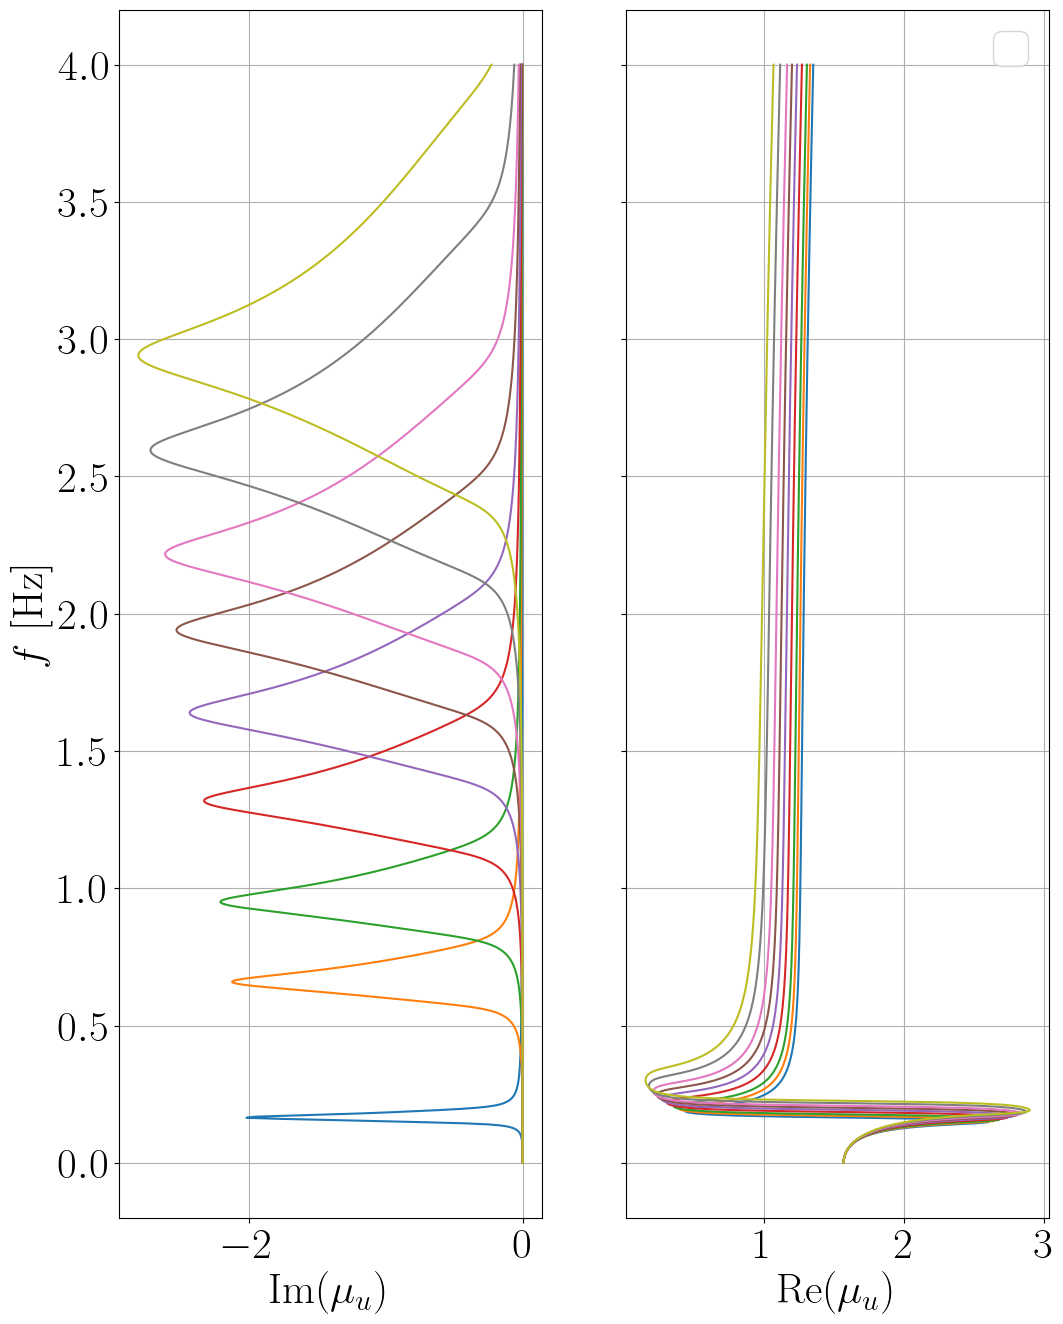

In [19]:
plt.rcParams['figure.figsize'] = [12, 16]


# Color bar
N = len(T_values)
cmap = plt.get_cmap('inferno',N)
norm = mpl.colors.Normalize(vmin=T_values[0],vmax=T_values[-1])
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])


fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

for i in range(len(k_i)):
    #Realna os
    ax1.plot(np.imag(mu_u(f_a*2*np.pi/omega_0, kappa_i[i], alpha_i[i], upsilon_i[i])), f_a, lw=2, color=cmap(i), 
             label= r' $E_n (T=$'+ f' {T_values[i]}'+r'$^\circ$C)='+ f'{En_values[i]} MPa')
    
    #Imaginarna os
    ax2.plot(np.real(mu_u(f_a*2*np.pi/omega_0, kappa_i[0], alpha_i[0], upsilon_i[i])), f_a, )
    
    
ax1.set_xlabel(r'Im$(\mu_u)$')
ax1.set_ylabel(r'$f$ [Hz]')
ax1.locator_params(axis="x", nbins=3)
ax1.locator_params(axis="y", nbins=10)
#ax1.set_xlim(-0.2, 0)
#ax1.set_ylim(0, 4)
ax1.grid()

ax2.set_xlabel(r'Re$(\mu_u)$')
ax2.locator_params(axis="x", nbins=3)
ax2.locator_params(axis="y", nbins=10)
#ax2.set_xlim(0, 0.4)
#ax2.set_ylim(0, 4)
ax2.label_outer()
ax2.legend(loc= 'upper right')
ax2.grid()

plt.savefig('FRF_disperzijska.pdf', format='pdf')
plt.show()

In [ ]:
plt.rcParams['figure.figsize'] = [12, 16]
fig, (ax1, ax2) = plt.subplots(1, 2)
# IZRIS - variiramo dušenje in togost alpha = k/K
#Realna os
#
ax1.plot(np.imag(mu_u(f_a*2*np.pi/omega_0, kappa_i[0], alpha_i[0], zeta_i[0])), f_a, color='navy', linestyle='--', lw='1')
ax1.plot(np.imag(mu_u(f_a*2*np.pi/omega_0, kappa_i[0], alpha_i[0], zeta_i[1])), f_a, color='navy', linestyle='-', lw='2')
ax1.plot(np.imag(mu_u(f_a*2*np.pi/omega_0, kappa_i[0], alpha_i[0], zeta_i[2])), f_a, color='navy', linestyle='-.', lw='1')
#
ax1.plot(np.imag(mu_u(f_a*2*np.pi/omega_0, kappa_i[1], alpha_i[1], zeta_i[0])), f_a, color='crimson', linestyle='--', lw='1')
ax1.plot(np.imag(mu_u(f_a*2*np.pi/omega_0, kappa_i[1], alpha_i[1], zeta_i[1])), f_a, color='crimson', linestyle='-', lw='2')
ax1.plot(np.imag(mu_u(f_a*2*np.pi/omega_0, kappa_i[1], alpha_i[1], zeta_i[2])), f_a, color='crimson', linestyle='-.', lw='1')
#
ax1.plot(np.imag(mu_u(f_a*2*np.pi/omega_0, kappa_i[2], alpha_i[2], zeta_i[0])), f_a, color='orange', linestyle='--', lw='1')
ax1.plot(np.imag(mu_u(f_a*2*np.pi/omega_0, kappa_i[2], alpha_i[2], zeta_i[1])), f_a, color='orange', linestyle='-', lw='2')
ax1.plot(np.imag(mu_u(f_a*2*np.pi/omega_0, kappa_i[2], alpha_i[2], zeta_i[2])), f_a, color='orange', linestyle='-.', lw='1')

#Imaginarna os
ax2.plot(np.real(mu_u(f_a*2*np.pi/omega_0, kappa_i[0], alpha_i[0], zeta_i[0])), f_a, color='navy', linestyle='--', lw='1', label=r'$\zeta=$'+f'{np.round(zeta_i[0],3)}'
                                                                                    + r'$, \,\, \alpha=$'+f'{np.round(alpha_i[0],3)}')
ax2.plot(np.real(mu_u(f_a*2*np.pi/omega_0, kappa_i[0], alpha_i[0], zeta_i[1])), f_a, color='navy', linestyle='-', lw='2')
ax2.plot(np.real(mu_u(f_a*2*np.pi/omega_0, kappa_i[0], alpha_i[0], zeta_i[2])), f_a, color='navy', linestyle='-.', lw='1')
#
ax2.plot(np.real(mu_u(f_a*2*np.pi/omega_0, kappa_i[1], alpha_i[1], zeta_i[0])), f_a, color='crimson', linestyle='--', lw='1')
ax2.plot(np.real(mu_u(f_a*2*np.pi/omega_0, kappa_i[1], alpha_i[1], zeta_i[1])), f_a, color='crimson', linestyle='-', lw='2', label=r'$\zeta=$'+f'{np.round(zeta_i[1],3)}'
                                                                                    + r'$, \,\, \alpha=$'+f'{np.round(alpha_i[1],3)}')
ax2.plot(np.real(mu_u(f_a*2*np.pi/omega_0, kappa_i[1], alpha_i[1], zeta_i[2])), f_a, color='crimson', linestyle='-.', lw='1')
#
ax2.plot(np.real(mu_u(f_a*2*np.pi/omega_0, kappa_i[2], alpha_i[2], zeta_i[0])), f_a, color='orange', linestyle='--', lw='1')
ax2.plot(np.real(mu_u(f_a*2*np.pi/omega_0, kappa_i[2], alpha_i[2], zeta_i[1])), f_a, color='orange', linestyle='-', lw='2')
ax2.plot(np.real(mu_u(f_a*2*np.pi/omega_0, kappa_i[2], alpha_i[2], zeta_i[2])), f_a, color='orange', linestyle='-.', lw='1', label=r'$\zeta=$'+f'{np.round(zeta_i[2],3)}'
                                                                                    + r'$, \,\, \alpha=$'+f'{np.round(alpha_i[2],3)}')

ax1.axhspan(0.25, 0.6, alpha=0.15, color='grey')
ax1.axhspan(0.7, 1.3, alpha=0.15, color='grey')
ax1.axhspan(1.35, 2.2, alpha=0.15, color='grey')
ax2.axhspan(0.25, 0.6, alpha=0.15, color='grey')
ax2.axhspan(0.7, 1.3, alpha=0.15, color='grey')
ax2.axhspan(1.35, 2.2, alpha=0.15, color='grey', label='pasovna vrzel')

ax1.set_xlabel(r'Im$(\mu_u)$')
ax1.set_ylabel(r'$f$ [Hz]')
ax1.locator_params(axis="x", nbins=3)
ax1.locator_params(axis="y", nbins=10)
#ax1.set_xlim(-0.2, 0)
ax1.set_ylim(0, 4)
ax1.grid()

ax2.set_xlabel(r'Re$(\mu_u)$')
ax2.locator_params(axis="x", nbins=3)
ax2.locator_params(axis="y", nbins=10)
#ax2.set_xlim(0, 0.4)
ax2.set_ylim(0, 4)
ax2.label_outer()
ax2.legend(loc= 'upper right')
ax2.grid()

plt.savefig('FRF_disperzijska.pdf', format='pdf')
plt.show()